In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
import matplotlib.pyplot as plt
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
from matplotlib import pyplot
import math  
from datetime import datetime

C:\Users\thieu\anaconda3\envs\tsa_course_env1\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [3]:

df = pd.read_csv("C:/Users/thieu/Downloads/Data-Gold.csv",index_col='Date',parse_dates=True)
df.tail(30)


,VND
Date,
2022-11-21,39976008.0
2022-11-22,39982902.0
2022-11-23,40113888.0
2022-11-24,40337943.0
2022-11-25,40306920.0
2022-11-28,40336794.0
2022-11-29,40529826.0
2022-11-30,40442502.0
2022-12-01,41713296.0


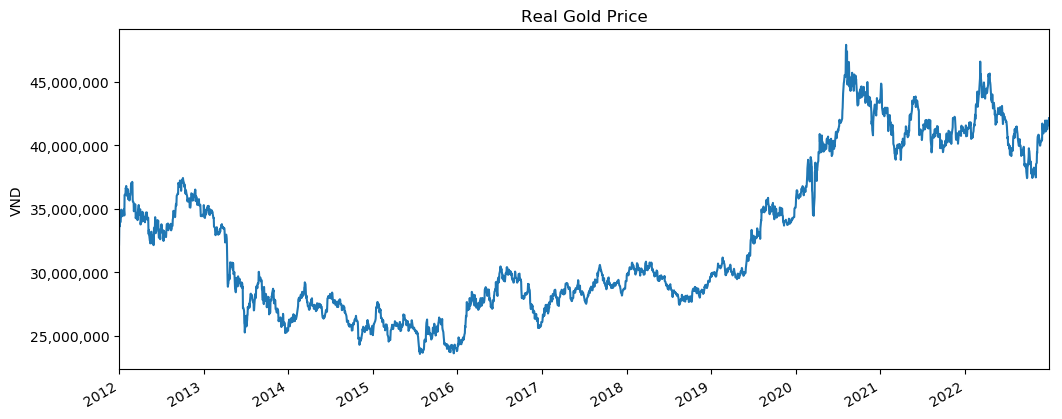

In [4]:
title = 'Real Gold Price'
ylabel='VND'
xlabel='' # we don't really need a label here

ax = df['VND'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [5]:
adf_test(df['VND'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -0.681541
p-value                    0.851473
# lags used               22.000000
# observations          2847.000000
critical value (1%)       -3.432649
critical value (5%)       -2.862556
critical value (10%)      -2.567311
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [6]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['VND'],k_diff=1)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(df['d1'],'Real Gold Price')

Augmented Dickey-Fuller Test: Real Gold Price
ADF test statistic     -1.256895e+01
p-value                 2.024078e-23
# lags used             2.100000e+01
# observations          2.847000e+03
critical value (1%)    -3.432649e+00
critical value (5%)    -2.862556e+00
critical value (10%)   -2.567311e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [7]:
df

,VND,d1
Date,,
2012-01-02,32202288.50,NaN
2012-01-03,33607538.00,1405249.50
2012-01-04,33923003.00,315465.00
2012-01-05,33628569.00,-294434.00
2012-01-06,34000652.75,372083.75
2012-01-09,33970717.50,-29935.25
2012-01-10,34406466.00,435748.50
2012-01-11,34374352.25,-32113.75
2012-01-12,34939135.00,564782.75


In [8]:
len(df)


2870

In [9]:
 
from sklearn.model_selection import train_test_split 
 
# Splitting the dataset into 80% training data and 20% testing data.
train, test = train_test_split(df, test_size=.20, random_state=0,shuffle=False)


In [10]:
df = pd.concat([train, test],    # Combine vertically
                          ignore_index = True,
                          sort = False)
df.head(5)  

,VND,d1
0,32202288.50,NaN
1,33607538.00,1405249.50
2,33923003.00,315465.00
3,33628569.00,-294434.00
4,34000652.75,372083.75


In [11]:
auto_arima(train['VND'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2295
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -32205.679
Method:                           css   S.D. of innovations         300750.737
Date:                Mon, 02 Jan 2023   AIC                          64415.358
Time:                        08:22:54   BIC                          64426.835
Sample:                             1   HQIC                         64419.543
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5212.9869   6277.914      0.830      0.406   -7091.498    1.75e+04
==============================================================================
"""

In [12]:
model = ARIMA(train['VND'],order=(0,1,0))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.VND   No. Observations:                 2295
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -32205.679
Method:                           css   S.D. of innovations         300750.737
Date:                Mon, 02 Jan 2023   AIC                          64415.358
Time:                        08:22:56   BIC                          64426.835
Sample:                    01-03-2012   HQIC                         64419.543
                         - 10-19-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5212.9869   6277.914      0.830      0.406   -7091.498    1.75e+04
==============================================================================
"""

In [13]:
# Obtain predicted values
start = len(train)
end  = len(train)+len(test)-1
pred = fitted.predict(start=start, end=end, dynamic=False, typ='levels')


In [14]:
# Compare predictions to expected values
for i in range(len(pred)):
    print(f"predicted={pred[i]}, expected={test['VND'][i]}")

predicted=44171306.44691068, expected=44003960.54
predicted=44176519.43382136, expected=44597946.44
predicted=44181732.420732036, expected=44058317.02
predicted=44186945.407642715, expected=44120893.79
predicted=44192158.39455339, expected=43999425.29
predicted=44197371.38146407, expected=44167454.92
predicted=44202584.36837475, expected=43338895.04
predicted=44207797.35528543, expected=43354490.28
predicted=44213010.34219611, expected=43625989.89
predicted=44218223.329106785, expected=43803154.99
predicted=44223436.316017464, expected=44229624.38
predicted=44228649.30292814, expected=44040724.36
predicted=44233862.28983882, expected=44925516.07
predicted=44239075.2767495, expected=44980952.33
predicted=44244288.26366018, expected=43272811.33
predicted=44249501.250570856, expected=43538871.37
predicted=44254714.237481534, expected=43128445.59
predicted=44259927.22439221, expected=43450588.44
predicted=44265140.21130289, expected=43823496.14
predicted=44270353.19821357, expected=4369972

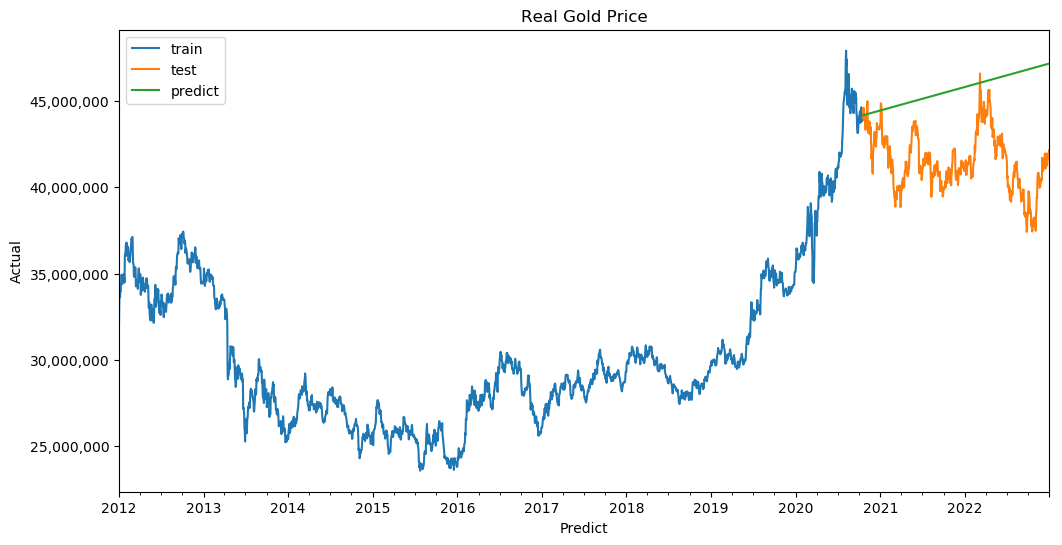

In [15]:
# Plot predictions against known values
title = 'Real Gold Price'
ylabel='Actual'
xlabel='Predict' # we don't really need a label here
pd=train['VND'].plot(legend=True,label='train')
ax = test['VND'].plot(legend=True,figsize=(12,6),title=title,label='test')
pred.plot(legend=True,label='predict')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [16]:
MSE = np.square(np.subtract(test['VND'],pred)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

4697358.813118332


In [17]:
def mape(y_test, pred):
    y_test, pred = np.array(test['VND']), np.array(pred)
    mape = np.mean(np.abs((test['VND'] - pred) / test['VND']*100))
    return mape
print(mape(test['VND'],pred))

10.325115196608749


In [18]:
model = ARIMA(df['VND'],order=(0,1,0))
results = model.fit()
fcast = results.predict(len(df),len(df)+30,typ='levels').rename('ARIMA(0,1,0) Forecast')

In [19]:
print(fcast)

2870    4.214189e+07
2871    4.214535e+07
2872    4.214882e+07
2873    4.215228e+07
2874    4.215574e+07
2875    4.215921e+07
2876    4.216267e+07
2877    4.216613e+07
2878    4.216960e+07
2879    4.217306e+07
2880    4.217652e+07
2881    4.217999e+07
2882    4.218345e+07
2883    4.218691e+07
2884    4.219038e+07
2885    4.219384e+07
2886    4.219730e+07
2887    4.220076e+07
2888    4.220423e+07
2889    4.220769e+07
2890    4.221115e+07
2891    4.221462e+07
2892    4.221808e+07
2893    4.222154e+07
2894    4.222501e+07
2895    4.222847e+07
2896    4.223193e+07
2897    4.223540e+07
2898    4.223886e+07
2899    4.224232e+07
2900    4.224579e+07
Name: ARIMA(0,1,0) Forecast, dtype: float64


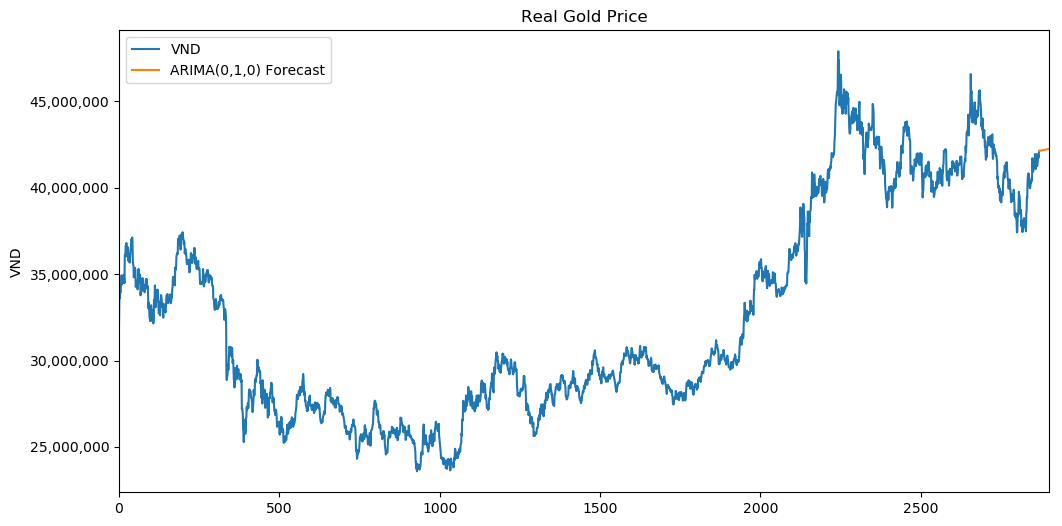

In [20]:
# Plot predictions against known values
title = 'Real Gold Price'
ylabel='VND'
xlabel='' # we don't really need a label here

ax = df['VND'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);
